In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_confirmed_can = pd.read_csv(r'D:\python\3335\untitled\Data\time_series_covid19_confirmed_Canada.csv')
df_deaths_can = pd.read_csv(r'D:\python\3335\untitled\Data\time_series_covid19_deaths_Canada.csv')

In [5]:
df_confirmed.head()

NameError: name 'df_confirmed' is not defined

In [6]:
df_deaths

NameError: name 'df_deaths' is not defined

In [8]:
df_confirmed_can = df_confirmed_can.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths_can = df_deaths_can.rename(columns={"Province/State":"state","Country/Region": "country"})

In [9]:
df_confirmed_can = df_confirmed_can.replace(np.nan, '', regex=True)
df_deaths_can = df_deaths_can.replace(np.nan, '', regex=True)

In [7]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    plt.title( plt_title,{'fontsize':title_fsize})
    plt.yscale(scale)
    plt.minorticks_on()
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
   

In [8]:
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        ax = f.add_subplot(figure[1],figure[2],figure[3])
        
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    

    if country != None:
        params = ["country",country]
    elif state != None:
        params = ["state",state]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')


    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    axis_label = ["Days","No of Cases"]
    
    plot_params(ax,axis_label,scale = scale)
    
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    l = plt.legend(loc= "best",fontsize = 10)
    if figure == None:
        plt.show()

In [24]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed_can)):
    folium.Circle(
        location=[df_confirmed_can.iloc[i]['Lat'], df_confirmed_can.iloc[i]['Long']],
        tooltip =   str(np.nan_to_num(df_confirmed_can.iloc[i]['state']))+"\n"+
                    "         Confirmed: "+str(df_confirmed_can.iloc[i,-1])+"\n"+
                    "         Deaths:   "+str(df_deaths_can.iloc[i,-1])+"\n",
        radius=(int((np.log(df_confirmed_can.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


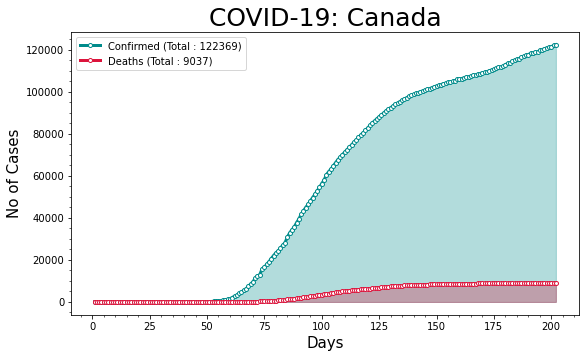

In [10]:
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 15000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

In [11]:
df_confirmed.columns

Index(['state', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '08-02-2020', '08-03-2020', '08-04-2020', '08-05-2020', '08-06-2020',
       '08-07-2020', '08-08-2020', '08-09-2020', '08-10-2020', '08-11-2020'],
      dtype='object', length=207)

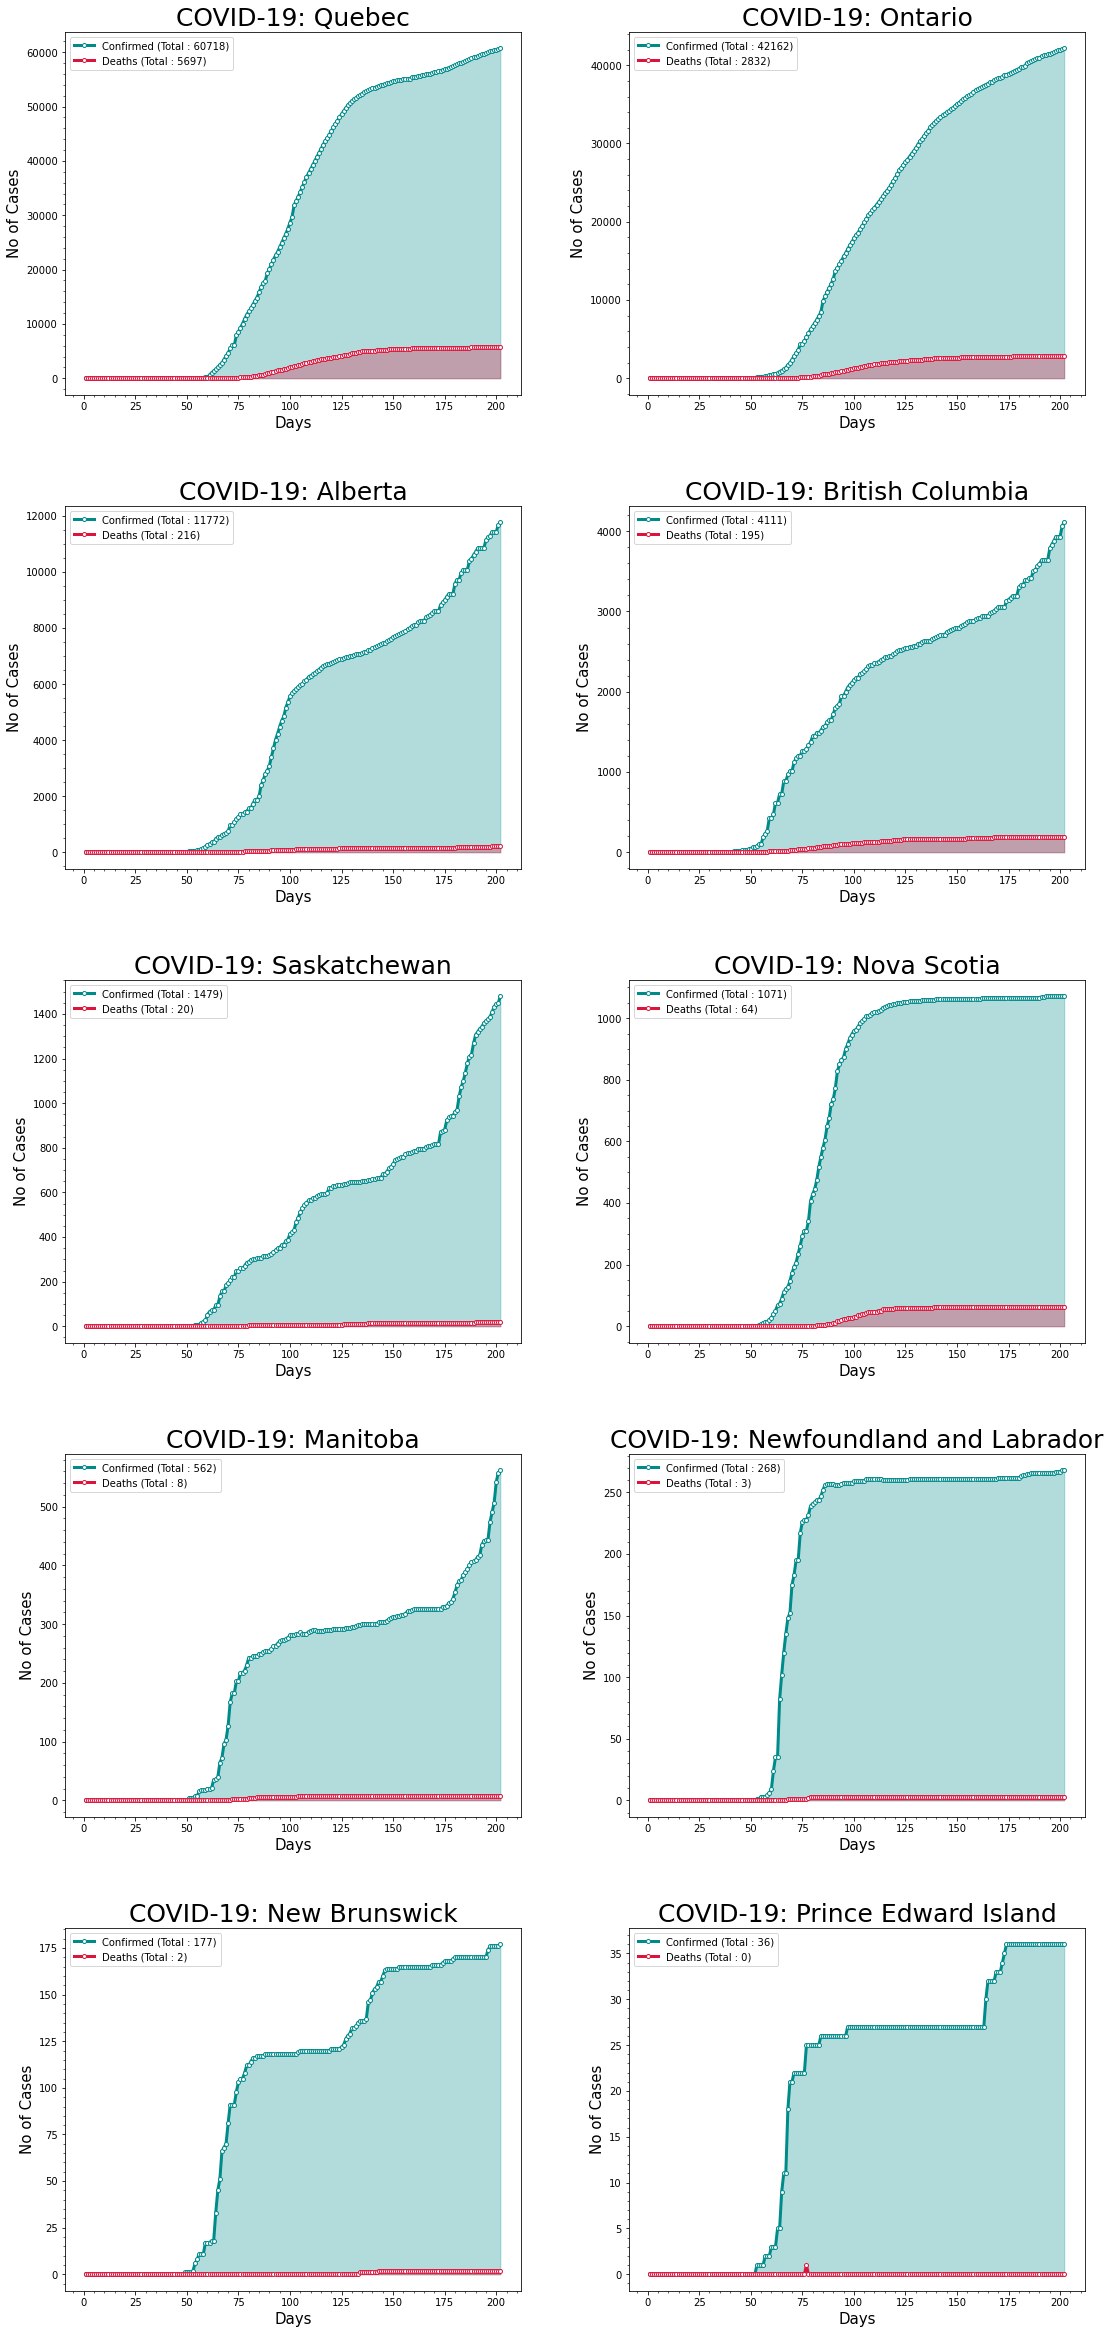

In [12]:
df_countries = df_confirmed.groupby(["state"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-2],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-2]] >= 15].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,state = country,figure = [f,rows,cols, i+1])

plt.show()

In [90]:
df_confirmed.columns

Index(['state', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '08-02-2020', '08-03-2020', '08-04-2020', '08-05-2020', '08-06-2020',
       '08-07-2020', '08-08-2020', '08-09-2020', '08-10-2020', '08-11-2020'],
      dtype='object', length=207)

In [13]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_state.csv")

In [14]:
df_covid19.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Australian Capital Territory,Australia,2020-08-14 16:30:18,-35.4735,149.0124,113,3,110.0,0.0,NaN,26.395702,NaN,NaN,2.654867,3601,AUS,NaN,NaN
1,New South Wales,Australia,2020-08-14 16:30:18,-33.8688,151.2093,3936,51,2994.0,891.0,NaN,48.484848,NaN,NaN,1.295732,3602,AUS,NaN,NaN
2,Northern Territory,Australia,2020-08-14 16:30:18,-12.4634,130.8456,33,0,31.0,2.0,NaN,13.436482,NaN,NaN,0.000000,3603,AUS,NaN,NaN
3,Queensland,Australia,2020-08-14 16:30:18,-27.4698,153.0251,1092,6,1076.0,10.0,NaN,21.346887,NaN,NaN,0.549451,3604,AUS,NaN,NaN
4,South Australia,Australia,2020-08-14 16:30:18,-34.9285,138.6007,460,4,449.0,7.0,NaN,26.188443,NaN,NaN,0.869565,3605,AUS,NaN,NaN


In [15]:
df_covid19.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [16]:
df_province_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update',"FIPS",'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],axis =1)
df_province_cases.fillna(0,inplace=True)

In [17]:
df_province_cases.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
0,Australian Capital Territory,Australia,113,3,110.0,0.0
1,New South Wales,Australia,3936,51,2994.0,891.0
2,Northern Territory,Australia,33,0,31.0,2.0
3,Queensland,Australia,1092,6,1076.0,10.0
4,South Australia,Australia,460,4,449.0,7.0


In [18]:
df_country = df_province_cases.groupby(["Country_Region"])

In [19]:
df_province_cases2 = df_country.get_group("Canada")
df_province_cases2

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
35,Alberta,Canada,11969,220,10713.0,1036.0
36,British Columbia,Canada,4274,196,3500.0,578.0
37,Diamond Princess,Canada,0,1,0.0,-1.0
38,Grand Princess,Canada,13,0,13.0,0.0
39,Manitoba,Canada,603,8,377.0,218.0
40,New Brunswick,Canada,180,2,169.0,9.0
41,Newfoundland and Labrador,Canada,268,3,263.0,2.0
42,Northwest Territories,Canada,5,0,5.0,0.0
43,Nova Scotia,Canada,1072,64,1007.0,1.0
44,Ontario,Canada,42325,2834,38449.0,1042.0


In [20]:
df_province_cases2.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
46,Quebec,Canada,60917,5715,53441.000000,1761.000000
44,Ontario,Canada,42325,2834,38449.000000,1042.000000
35,Alberta,Canada,11969,220,10713.000000,1036.000000
36,British Columbia,Canada,4274,196,3500.000000,578.000000
47,Saskatchewan,Canada,1511,20,1325.000000,166.000000
43,Nova Scotia,Canada,1072,64,1007.000000,1.000000
39,Manitoba,Canada,603,8,377.000000,218.000000
41,Newfoundland and Labrador,Canada,268,3,263.000000,2.000000
40,New Brunswick,Canada,180,2,169.000000,9.000000
45,Prince Edward Island,Canada,41,0,36.000000,5.000000
